In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [61]:
company=pd.read_csv("Company.csv")
party=pd.read_csv("Party.csv")

In [62]:
#Denomination to crores and column names changed for company data set
company['Denomination']=pd.to_numeric(company['Denomination'])
company['Denomination']=company['Denomination']/1e7
company.rename(columns={'Denomination':'Denomination(Crore)'},inplace=True)
company.head(2)

,Date of Purchase,Purchaser Name,Denomination(Crore)
0,12-Apr-19,A B C INDIA LIMITED,0.01
1,12-Apr-19,A B C INDIA LIMITED,0.01


In [63]:
#Denomination to crores and column names changed for company data set
party['Denomination']=pd.to_numeric(party['Denomination'])
party['Denomination']=party['Denomination']/1e7
party.rename(columns={'Date of\nEncashment':'Date','Name of the Political Party':'Political Party','Denomination':'Denomination(Crore)'},inplace=True)
party.head(2)


,Date,Political Party,Denomination(Crore)
0,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,0.1
1,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,0.1


In [64]:
# which party appears maximum number of times 
party['Political Party'].value_counts()

Political Party
BHARTIYA JANTA PARTY                              8633
ALL INDIA TRINAMOOL CONGRESS                      3305
PRESIDENT, ALL INDIA CONGRESS COMMITTEE           3146
BHARAT RASHTRA SAMITHI                            1806
BIJU JANATA DAL                                    861
DMK PARTY IN PARLIAMENT                            648
YSR CONGRESS PARTY (YUVAJANA SRAMIKA R             472
SHIVSENA (POLITICAL PARTY)                         354
TELUGU DESAM PARTY                                 279
AAM AADMI PARTY                                    245
RASTRIYA JANTA DAL                                 149
NATIONALIST CONGRESS PARTY PARLIAMENT OF           116
JANATA DAL ( SECULAR )                              75
SIKKIM KRANTIKARI MORCHA                            50
ADYAKSHA SAMAJVADI PARTY                            46
JHARKHAND MUKTI MORCHA                              45
JANASENA PARTY                                      39
ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM         

In [65]:
# Which company purchases maximum
company['Purchaser Name'].value_counts()

Purchaser Name
FUTURE GAMING AND HOTEL SERVICES PR               1208
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     821
QWIKSUPPLYCHAINPRIVATELIMITED                      410
HALDIA ENERGY LIMITED                              395
VEDANTA LIMITED                                    386
                                                  ... 
MR. SAMEER BHATIA                                    1
B.DAS AND ASSOCIATES PVT. LTD.                       1
J B ENTERPRISE                                       1
RAYALA SEEMA WIND ENERGY PVT LTD                     1
GORUKANTI SURENDER RAO                               1
Name: count, Length: 1316, dtype: int64

In [66]:
# New column created in both data sets that stores the year 
party['Year']=pd.to_datetime(party['Date']).dt.year
company['Year']=pd.to_datetime(company['Date of Purchase']).dt.year

C:\Users\abhij\AppData\Local\Temp\ipykernel_9952\3413756359.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  party['Year']=pd.to_datetime(party['Date']).dt.year
C:\Users\abhij\AppData\Local\Temp\ipykernel_9952\3413756359.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  company['Year']=pd.to_datetime(company['Date of Purchase']).dt.year


In [67]:
# to calculate in which year parties transactions more
party['Year']=pd.to_numeric(party['Year'])
party['Year'].value_counts()

Year
2023.0    6365
2022.0    5300
2019.0    4783
2021.0    2642
2024.0     872
2020.0     459
Name: count, dtype: int64

In [68]:
# to calculate in which year company purchase most
company['Year']=pd.to_numeric(company['Year'])
company['Year'].value_counts()

Year
2023.0    6399
2022.0    5314
2019.0    3154
2021.0    2647
2024.0     897
2020.0     460
Name: count, dtype: int64

In [69]:
# in each year count which party transacts how many times
party_counts = party.groupby(['Year', 'Political Party']).size()
print(party_counts)

Year    Political Party                         
2019.0  AAM AADMI PARTY                               4
        ADYAKSHA SAMAJVADI PARTY                     40
        ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM     38
        ALL INDIA TRINAMOOL CONGRESS                241
        BHARAT RASHTRA SAMITHI                       63
                                                   ... 
2024.0  SHIVSENA (POLITICAL PARTY)                   25
        SIKKIM DEMOCRATIC FRONT                       5
        SIKKIM KRANTIKARI MORCHA                      3
        TELUGU DESAM PARTY                          120
        YSR CONGRESS PARTY (YUVAJANA SRAMIKA R        3
Length: 87, dtype: int64


In [70]:
# in each year count which company purchase how many time
company_counts = company.groupby(['Year', 'Purchaser Name']).size()
print(company_counts)

Year    Purchaser Name                                
2019.0  A B C INDIA LIMITED                               13
        ABHISHEK RATHI                                     4
        ACE COMERCIAL COMPANY PRIVATE LIMITED              7
        ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED     7
        ADIT BUILD WELL PVT LTD                            1
                                                          ..
2024.0  VIDUR GUPTA                                        5
        VIHAAN AUTO VENTURES PRIVATE LIMITED               2
        VIKAS PARASRAMPURIA                                2
        WESTERN UP POWER TRANSMISSION COMPANY LI MITED    30
        WESTWELL GASES PRIVATE LIMITED                     8
Length: 1589, dtype: int64


In [71]:
#calculates the total denomination for that party for that year
party_counts = party.groupby(['Year', 'Political Party'])['Denomination(Crore)'].sum().reset_index(name='Total Denomination')
print(party_counts)

      Year                           Political Party  Total Denomination
0   2019.0                           AAM AADMI PARTY              2.2000
1   2019.0                  ADYAKSHA SAMAJVADI PARTY             10.8400
2   2019.0  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM              6.0500
3   2019.0              ALL INDIA TRINAMOOL CONGRESS             87.0946
4   2019.0                    BHARAT RASHTRA SAMITHI             37.1529
..     ...                                       ...                 ...
82  2024.0                SHIVSENA (POLITICAL PARTY)             25.0000
83  2024.0                   SIKKIM DEMOCRATIC FRONT              0.5000
84  2024.0                  SIKKIM KRANTIKARI MORCHA              3.0000
85  2024.0                        TELUGU DESAM PARTY            118.2000
86  2024.0    YSR CONGRESS PARTY (YUVAJANA SRAMIKA R              3.0000

[87 rows x 3 columns]


In [72]:
#represents above data in tabular form considering the top 5 parties for each year having maximum denomination .
party_top5_per_year = party_counts.groupby('Year').apply(lambda x: x.nlargest(5, 'Total Denomination')).reset_index(drop=True)

for year, group in party_top5_per_year.groupby('Year'):
    print(f"\n{int(year)}:")
    print(tabulate(group.drop(columns='Year'), headers='keys', tablefmt='grid', showindex=False))



2019:
+-----------------------------------------+----------------------+
| Political Party                         |   Total Denomination |
+=========================================+======================+
| BHARTIYA JANTA PARTY                    |            1971.75   |
+-----------------------------------------+----------------------+
| PRESIDENT, ALL INDIA CONGRESS COMMITTEE |             170.311  |
+-----------------------------------------+----------------------+
| ALL INDIA TRINAMOOL CONGRESS            |              87.0946 |
+-----------------------------------------+----------------------+
| BHARAT RASHTRA SAMITHI                  |              37.1529 |
+-----------------------------------------+----------------------+
| SHIVSENA (POLITICAL PARTY)              |              32.38   |
+-----------------------------------------+----------------------+

2020:
+----------------------------------------+----------------------+
| Political Party                        |   Tota

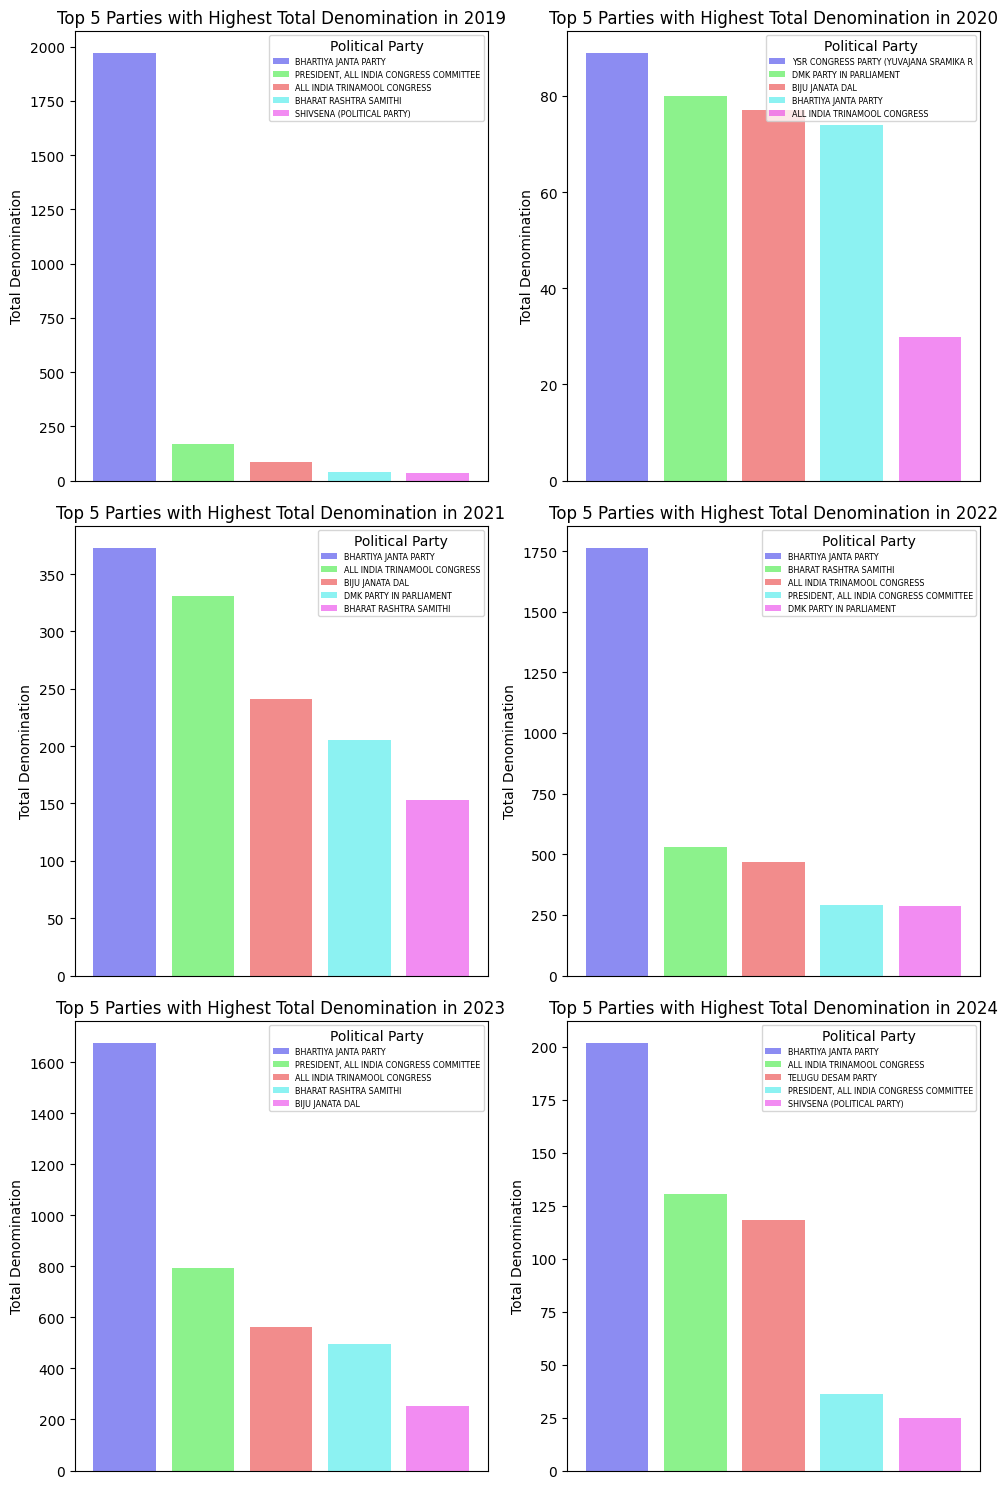

In [73]:

colors = [(0.1, 0.1, 0.9, 0.5), (0.1, 0.9, 0.1, 0.5), (0.9, 0.1, 0.1, 0.5), (0.1, 0.9, 0.9, 0.5), (0.9, 0.1, 0.9, 0.5)]

# Plotting of top 5 parties for each year having maximum denomination 
num_years = len(party_top5_per_year['Year'].unique())
num_rows = (num_years + 1) // 2  
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 5 * num_rows))

for i, (year, group) in enumerate(party_top5_per_year.groupby('Year')):
    row_index = i // 2
    col_index = i % 2
    ax = axes[row_index, col_index]
    
    bars = ax.bar(group['Political Party'], group['Total Denomination'], color=colors[:len(group)])

    ax.set_title(f"Top 5 Parties with Highest Total Denomination in {int(year)}")
    ax.set_xlabel('')  
    ax.set_ylabel('Total Denomination')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 

    legend = ax.legend(bars, group['Political Party'], loc='upper right', fontsize='xx-small') 

    legend.set_title('Political Party') 

plt.tight_layout()
plt.show()


In [74]:
#calculates the total denomination for that company for that year
company_counts = company.groupby(['Year', 'Purchaser Name'])['Denomination(Crore)'].sum().reset_index(name='Total Denomination')
print(company_counts)

        Year                                  Purchaser Name  \
0     2019.0                             A B C INDIA LIMITED   
1     2019.0                                  ABHISHEK RATHI   
2     2019.0           ACE COMERCIAL COMPANY PRIVATE LIMITED   
3     2019.0  ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED   
4     2019.0                         ADIT BUILD WELL PVT LTD   
...      ...                                             ...   
1584  2024.0                                     VIDUR GUPTA   
1585  2024.0            VIHAAN AUTO VENTURES PRIVATE LIMITED   
1586  2024.0                             VIKAS PARASRAMPURIA   
1587  2024.0  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
1588  2024.0                  WESTWELL GASES PRIVATE LIMITED   

      Total Denomination  
0                   0.40  
1                   0.04  
2                   0.25  
3                   0.25  
4                   1.00  
...                  ...  
1584                0.50  
1585           

In [75]:
company_top5_per_year = company_counts.groupby('Year').apply(lambda x: x.nlargest(5, 'Total Denomination')).reset_index(drop=True)
# Display in tabular form
for year, group in company_top5_per_year.groupby('Year'):
    print(f"\n{int(year)}:")
    print(tabulate(group.drop(columns='Year'), headers='keys', tablefmt='grid', showindex=False))



2019:
+------------------------------------------------+----------------------+
| Purchaser Name                                 |   Total Denomination |
+================================================+======================+
| KEVENTER FOODPARK INFRA LIMITED                |               195    |
+------------------------------------------------+----------------------+
| MADANLAL LTD.                                  |               185.5  |
+------------------------------------------------+----------------------+
| MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED |               130    |
+------------------------------------------------+----------------------+
| VEDANTA LIMITED                                |                52.65 |
+------------------------------------------------+----------------------+
| ESSEL MINING AND INDS LTD                      |                50    |
+------------------------------------------------+----------------------+

2020:
+-----------------------

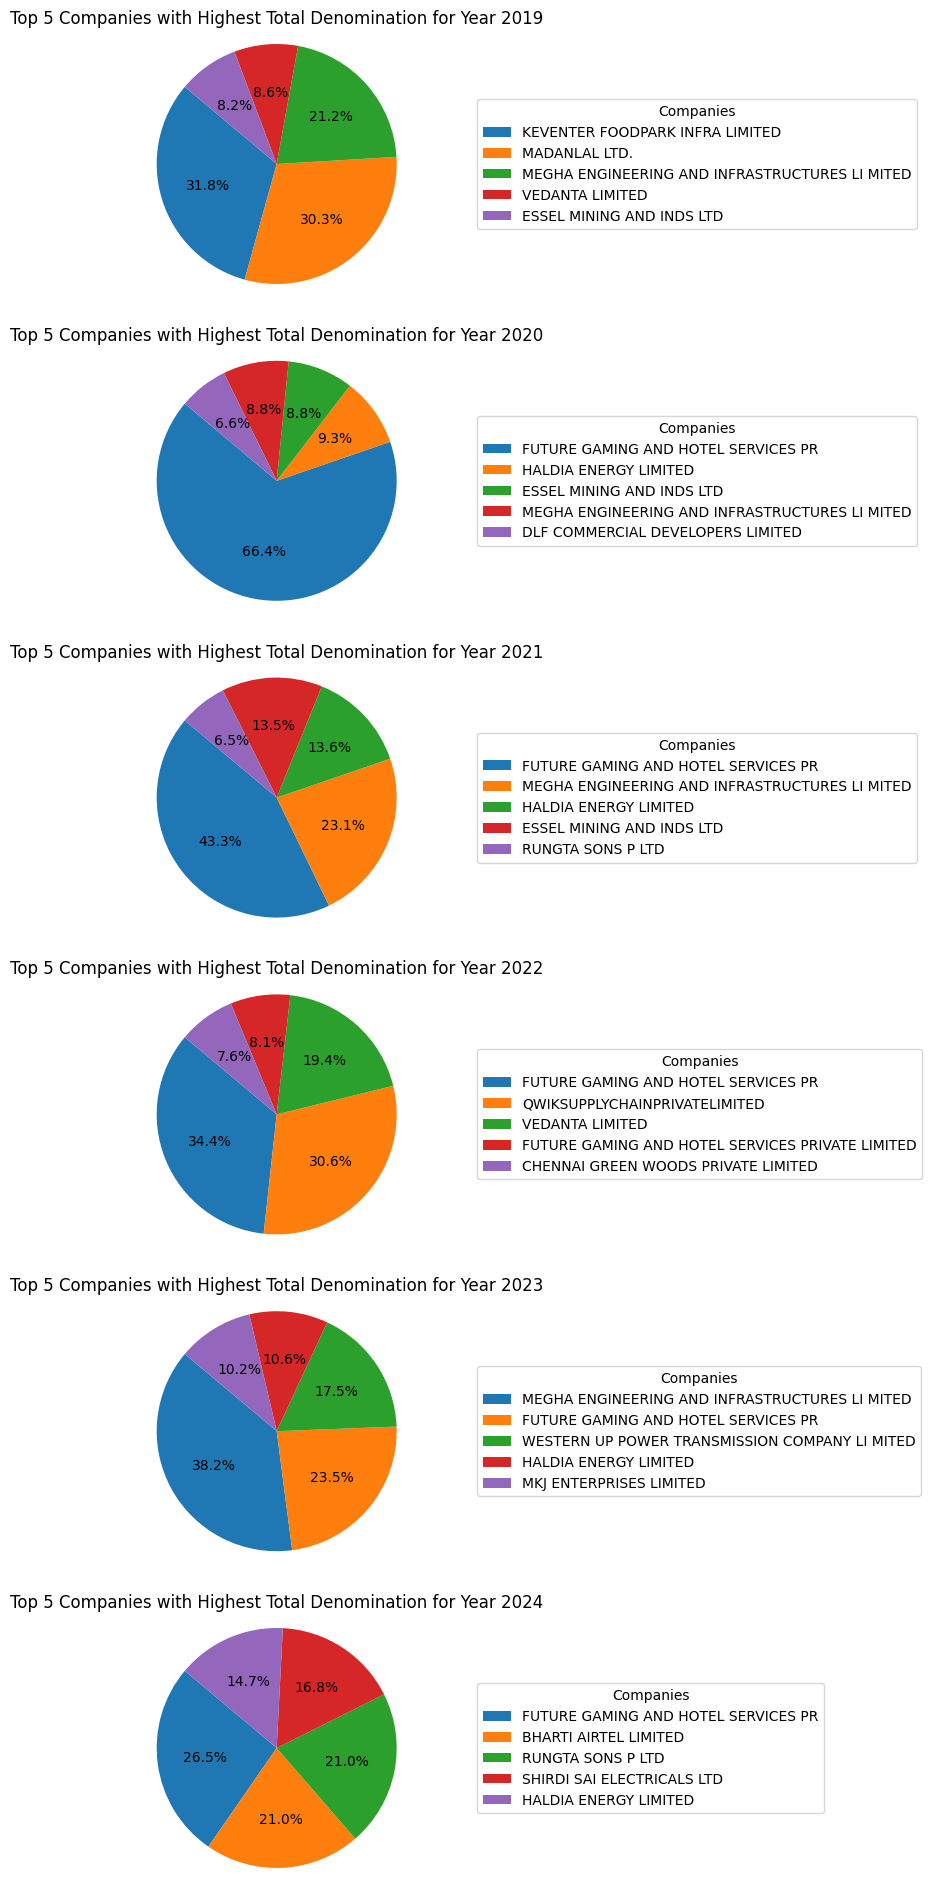

In [76]:
#top 5 companies with highest total denomination per year
num_years = len(company_top5_per_year['Year'].unique())

# Create subplots
fig, axes = plt.subplots(num_years, 1, figsize=(5, 4*num_years))

for i, (year, group) in enumerate(company_top5_per_year.groupby('Year')):
    
    wedges, texts, autotexts = axes[i].pie(group['Total Denomination'], autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Top 5 Companies with Highest Total Denomination for Year {int(year)}')
    axes[i].axis('equal')  

    axes[i].legend(wedges, group['Purchaser Name'], title='Companies', loc='center left', bbox_to_anchor=(1,0.5))

plt.show()


In [77]:
#calculates each month total denomination in each year the company data set
company['Date of Purchase'] = pd.to_datetime(company['Date of Purchase'])
company['Year'] = company['Date of Purchase'].dt.year
company['Month'] = company['Date of Purchase'].dt.month

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

company['Month'] = company['Month'].map(month_names)
company['Month'] = pd.Categorical(company['Month'], categories=month_names.values(), ordered=True)
company_monthly_denomination = company.groupby(['Year', 'Month'])['Denomination(Crore)'].sum().reset_index()
monthly_denomination_pivot = company_monthly_denomination.pivot(index='Month', columns='Year', values='Denomination(Crore)').fillna(0)

monthly_denomination_pivot = monthly_denomination_pivot.loc[(monthly_denomination_pivot != 0).any(axis=1)]

print("\t\tCompanies Monthly per year \n")
print(tabulate(monthly_denomination_pivot, headers='keys', tablefmt='pretty'))


		Companies Monthly per year 

+----------+----------+----------+----------+-----------+-----------+----------+
|  Month   |  2019.0  |  2020.0  |  2021.0  |  2022.0   |  2023.0   |  2024.0  |
+----------+----------+----------+----------+-----------+-----------+----------+
| January  |   0.0    |  81.67   |   42.1   | 1213.2601 | 308.7626  | 571.8003 |
|  April   | 666.5601 |   0.0    | 695.3402 |  648.487  |   970.5   |   0.0    |
|   May    | 822.2579 |   0.0    |   0.0    |    0.0    |    0.0    |   0.0    |
|   July   |  45.38   |   0.0    | 150.513  | 389.5005  | 812.8002  |   0.0    |
| October  |  231.93  | 282.2901 | 614.3395 |  545.25   | 1148.3807 |   0.0    |
| November |   0.0    |   0.0    |   0.0    |  676.26   | 1006.031  |   0.0    |
| December |   0.0    |   0.0    |   0.0    |   232.1   |    0.0    |   0.0    |
+----------+----------+----------+----------+-----------+-----------+----------+


C:\Users\abhij\AppData\Local\Temp\ipykernel_9952\933957963.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  company['Date of Purchase'] = pd.to_datetime(company['Date of Purchase'])


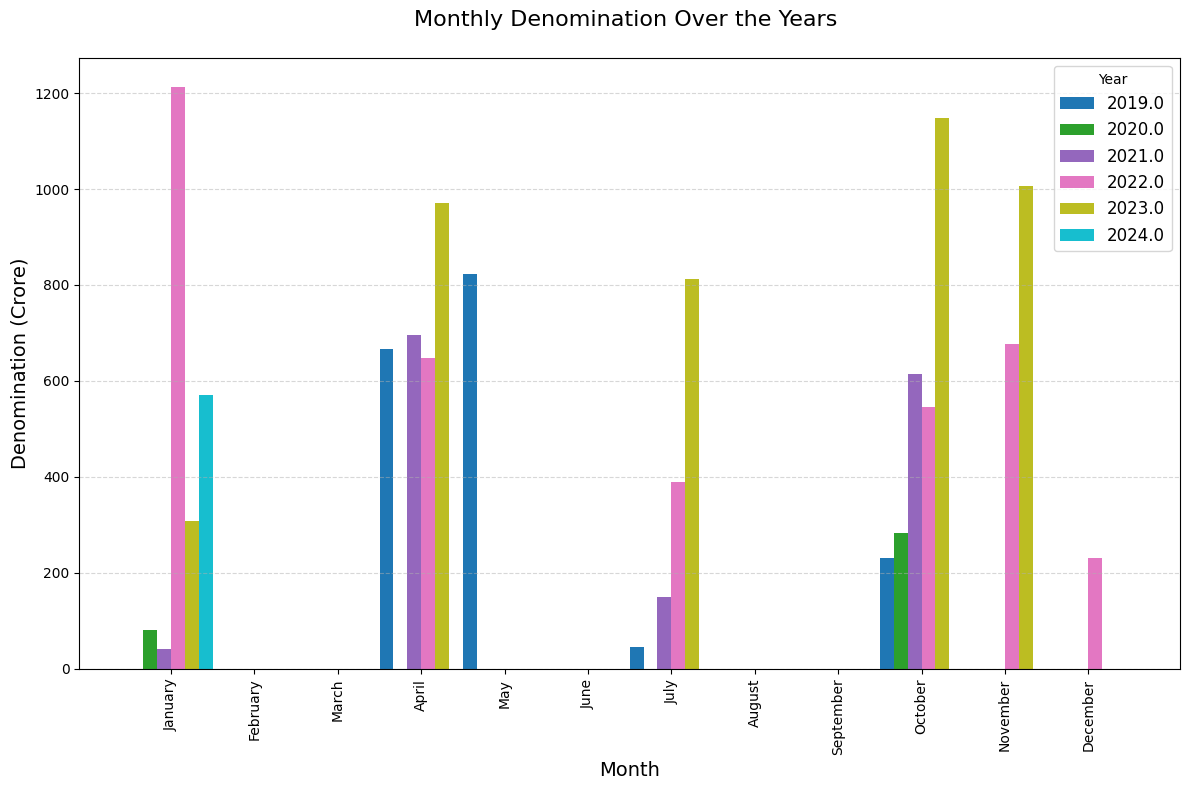

In [78]:

num_years = len(company_monthly_denomination['Year'].unique())
num_months = len(month_names)

bar_width = 1.0 / num_years  # evenly width divided among the years

years = sorted(company_monthly_denomination['Year'].unique())

plt.figure(figsize=(12, 8))
ax = plt.gca()

colors = plt.cm.tab10(np.linspace(0, 1, num_years))

for i, year in enumerate(years):
    data_year = company_monthly_denomination[company_monthly_denomination['Year'] == year]
    positions = np.arange(num_months) + i * bar_width  
    plt.bar(positions, data_year['Denomination(Crore)'], width=bar_width, label=str(year), color=colors[i])

valid_months = company_monthly_denomination['Month'].unique()
plt.xticks(np.arange(len(valid_months)) + bar_width * (num_years - 1) / 2, valid_months, rotation=90)

plt.title('Monthly Denomination Over the Years \n', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Denomination (Crore)', fontsize=14)
plt.legend(title='Year', fontsize=12)

plt.grid(axis='y',linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
